In [52]:
import click, h5py, collections, tqdm
import numpy as np

import astropy.time as time
#from dynesty import plotting as dyplot
import matplotlib.pyplot as plt

SN_TYPES=[
    ('Ibc', [b'Ib', b'Ic']),
    ('Ia', [b'Ia']),
    ('IIb', [b'IIb']),
    ('IcBL', [b'Ic BL'])
]

In [6]:
f = h5py.File('../bar.h5', 'r')

In [51]:
f.keys()
for k in f.keys():
    print(k, f[k].keys())
np.unique(f['2019-8-21']['P60']['sn_type'])

2019-10-13 <KeysViewHDF5 ['P60']>
2019-10-19 <KeysViewHDF5 ['P60']>
2019-10-21 <KeysViewHDF5 ['NOT']>
2019-10-26 <KeysViewHDF5 ['P60']>
2019-10-3 <KeysViewHDF5 ['NOT']>
2019-10-6 <KeysViewHDF5 ['P60']>
2019-11-10 <KeysViewHDF5 ['P60']>
2019-11-22 <KeysViewHDF5 ['NOT']>
2019-11-23 <KeysViewHDF5 ['P60']>
2019-11-3 <KeysViewHDF5 ['P60']>
2019-12-18 <KeysViewHDF5 ['P60']>
2019-12-21 <KeysViewHDF5 ['P60']>
2019-8-21 <KeysViewHDF5 ['P60']>
2019-8-23 <KeysViewHDF5 ['P60']>
2019-8-24 <KeysViewHDF5 ['P60']>
2019-8-27 <KeysViewHDF5 ['P200', 'P60']>
2019-8-30 <KeysViewHDF5 ['NOT']>
2019-8-31 <KeysViewHDF5 ['P60']>
2019-9-10 <KeysViewHDF5 ['P60']>
2019-9-17 <KeysViewHDF5 ['P60']>
2019-9-22 <KeysViewHDF5 ['P60']>
2019-9-27 <KeysViewHDF5 ['P60']>
2020-1-24 <KeysViewHDF5 ['Keck1']>
2020-1-3 <KeysViewHDF5 ['P60']>


array([b'II', b'II P', b'IIb', b'IIn', b'IIn/Ibn', b'Ia', b'Ia CSM',
       b'Ia Pec', b'Ia-02cx', b'Ia-91T', b'Ib', b'Ib Pec', b'Ib/c',
       b'Ibn', b'Ic', b'Ic BL', b'Ic Pec', b'SLSN-I', b'SLSN-II'],
      dtype='|S10')

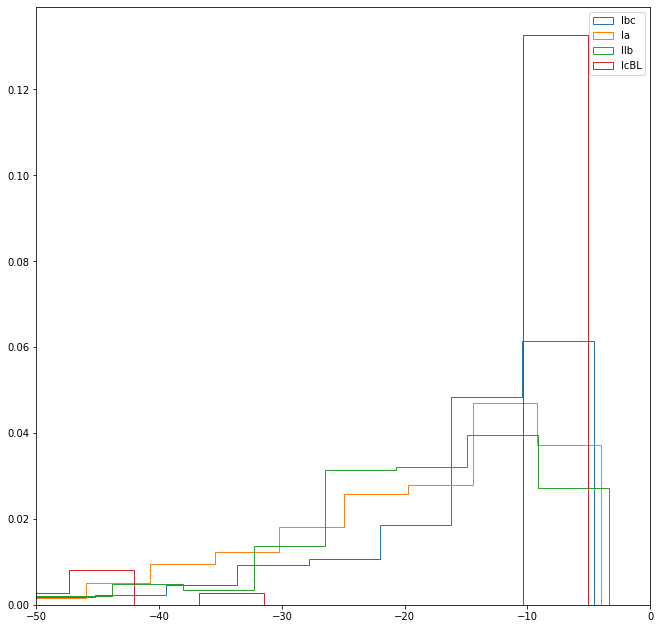

In [53]:
ds = f['2019-8-21']['P60']
idx = np.logical_and(ds['snid_highpass_overlap'] > 450, ds['snid_highpass_likelihood'] > -150)
np.count_nonzero(idx)
plt.figure(figsize=(11,11))
for sn_label, sn_types in SN_TYPES:
    idx2 = np.zeros(len(idx), dtype=np.bool)
    for x in sn_types:
        idx2 = np.logical_or(idx2, ds['sn_type'] == x)
    idx3 = np.logical_and(idx, idx2)
    plt.hist(ds['snid_highpass_likelihood'][idx3], label=sn_label, histtype='step', density=True, bins=25)
plt.xlim((-50,0))
plt.legend()

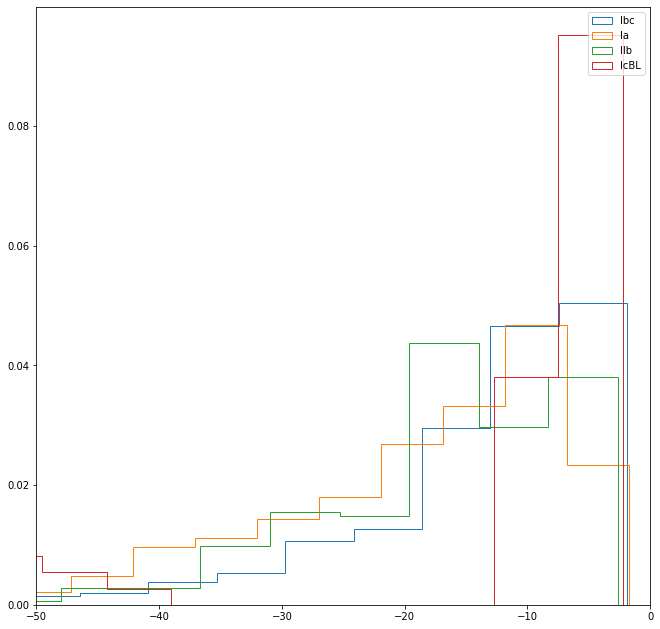

In [54]:
ds = f['2019-8-27']['P200']
idx = np.logical_and(ds['snid_highpass_overlap'] > 450, ds['snid_highpass_likelihood'] > -150)
np.count_nonzero(idx)
plt.figure(figsize=(11,11))
for sn_label, sn_types in SN_TYPES:
    idx2 = np.zeros(len(idx), dtype=np.bool)
    for x in sn_types:
        idx2 = np.logical_or(idx2, ds['sn_type'] == x)
    idx3 = np.logical_and(idx, idx2)
    plt.hist(ds['snid_highpass_likelihood'][idx3], label=sn_label, histtype='step', density=True, bins=25)
plt.xlim((-50,0))
plt.legend()

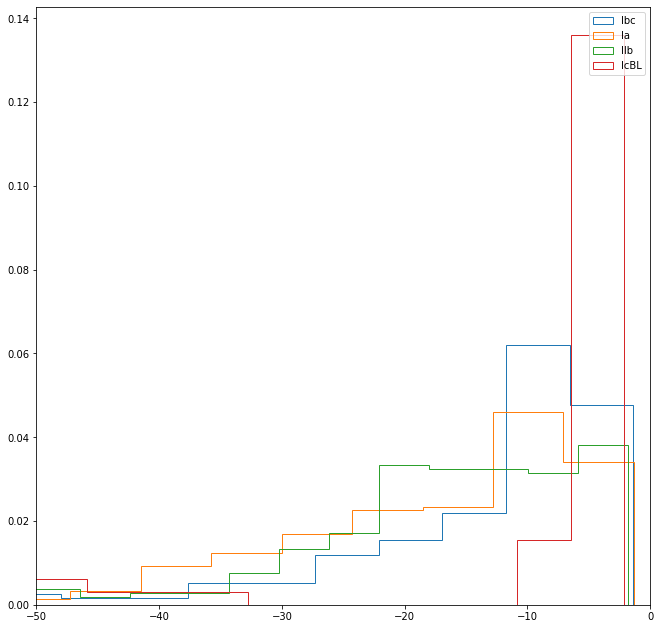

In [62]:
ds = f['2019-8-30']['NOT']
idx = np.logical_and(ds['snid_highpass_overlap'] > 450, ds['snid_highpass_likelihood'] > -300)
np.count_nonzero(idx)
plt.figure(figsize=(11,11))
for sn_label, sn_types in SN_TYPES:
    idx2 = np.zeros(len(idx), dtype=np.bool)
    for x in sn_types:
        idx2 = np.logical_or(idx2, ds['sn_type'] == x)
    idx3 = np.logical_and(idx, idx2)
    plt.hist(ds['snid_highpass_likelihood'][idx3], label=sn_label, histtype='step', density=True, bins=50)
plt.xlim((-50,0))
plt.legend()

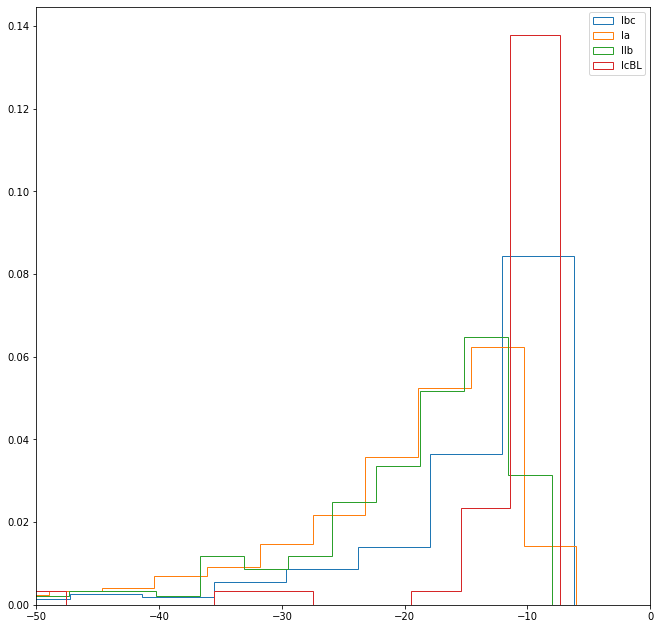

In [61]:
ds = f['2019-11-k22']['NOT']
idx = np.logical_and(ds['snid_highpass_overlap'] > 450, ds['snid_highpass_likelihood'] > -300)
np.count_nonzero(idx)
plt.figure(figsize=(11,11))
for sn_label, sn_types in SN_TYPES:
    idx2 = np.zeros(len(idx), dtype=np.bool)
    for x in sn_types:
        idx2 = np.logical_or(idx2, ds['sn_type'] == x)
    idx3 = np.logical_and(idx, idx2)
    plt.hist(ds['snid_highpass_likelihood'][idx3], label=sn_label, histtype='step', density=True, bins=50)
plt.xlim((-50,0))
plt.legend()

In [63]:
f2 = h5py.File('../foo.h5', 'r')
for k in f2:
    if f2[k].attrs['claimedtype'] == 'Ic BL':
        print(k)

SN2006aj
SN2010bh
SN2012ap
